# Linear Regression with one variable

Welcome to your first lab! You will build a linear regression with one variable.

Your first task will be prediction of kangaroo nasal width having its length.

**Instructions:**
- Do not use loops (for/while) in your code, unless the instructions explicitly ask you to do so.

**You will learn to:**
- Build the general architecture of a learning algorithm, including:
    - Initializing parameters
    - Calculating the cost function and its gradient
    - Using an optimization algorithm (gradient descent) 
- Gather all three functions above into a main model function, in the right order.

> **Important note:** Before submission make sure that you **didn't add or delete any notebook cells**. Otherwise your work may not be accepted by the validator!

## 0 - Download data

In [1]:
!pip install wget
import wget
wget.download('https://dru.fra1.digitaloceanspaces.com/DS_Fundamentals/datasets/04_supervised_learning/Linear_Regression_with_one_variable/kangaroo.csv')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=0f78a9347bf17d59bf61db033a58c2dd5d0c5de91a2f96039ac25e260b279639
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


'kangaroo.csv'

## 1 - Packages ##

First, let's run the cell below to import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## 2 - Overview of the Problem set ##

**Problem Statement**: You are given a dataset  containing:

  - a training set of `m_train` examples
  - a test set of `m_test` examples

Let's get more familiar with the dataset. Load the data by running the following code.

In [3]:
# Loading the data

def load_data():
    from sklearn.model_selection import train_test_split

    data = np.genfromtxt('kangaroo.csv', delimiter=',')
    
    x = data[:, 0]
    y = data[:, 1]
    
    train_set_x, test_set_x, train_set_y, test_set_y = train_test_split(x, y, test_size=0.33, random_state=42)
        
    return train_set_x, test_set_x, train_set_y, test_set_y

train_set_x, test_set_x, train_set_y, test_set_y = load_data()

In [ ]:
print (train_set_x.shape, test_set_x.shape, train_set_y.shape, test_set_y.shape)

(30,) (15,) (30,) (15,)


Many software bugs in machine learning come from having matrix/vector dimensions that don't fit. If you can keep your matrix/vector dimensions straight you will go a long way toward eliminating many bugs. 

**Exercise:** Find the values for:

   - `m_train` (number of training examples)
   - `m_test` (number of test examples)


In [4]:
### START CODE HERE ### (≈ 2 lines of code)
m_train = 30
m_test = 15
### END CODE HERE ###

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("train_set_x shape: " + str(train_set_x.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 30
Number of testing examples: m_test = 15
train_set_x shape: (30,)
train_set_y shape: (30,)
test_set_x shape: (15,)
test_set_y shape: (15,)


**Expected Output for m_train and m_test**: 
<table>
  <tr>
    <td>Number of training examples: m_train = 30</td>
  </tr>
  <tr>
    <td>Number of testing examples: m_test = 15</td>
  </tr>
  <tr>
    <td>train_set_x shape: (30,)</td>
  </tr>
  <tr>
    <td>train_set_y shape: (30,)</td>
  </tr>
   <tr>
    <td>test_set_x shape: (15,)</td>
  </tr>
  <tr>
    <td>test_set_y shape: (15,)</td>
  </tr>  
</table>

### Data visualization

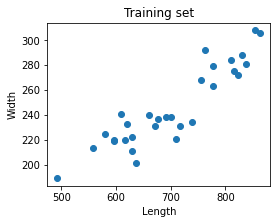

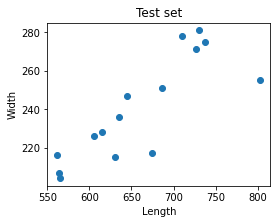

In [5]:
# Training set
plt.figure(figsize=(4, 3))
plt.scatter(train_set_x, train_set_y)
plt.title("Training set")
plt.xlabel("Length")
plt.ylabel("Width");

# Test set
plt.figure(figsize=(4, 3))
plt.scatter(test_set_x, test_set_y)
plt.title("Test set")
plt.xlabel("Length")
plt.ylabel("Width");

### Standardization
One common preprocessing step in machine learning is to center and standardize your dataset, meaning that you substract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array.

$$X_{new}= \frac{X - \mu}{\sigma}$$

Let's standardize our dataset.

In [6]:
mean = np.concatenate([train_set_x,test_set_x]).mean()
std = np.concatenate([train_set_x,test_set_x]).std()

train_set_x = (train_set_x - mean) / std
test_set_x = (test_set_x - mean) / std

### Standardized data visualization

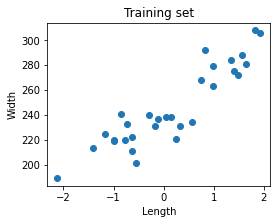

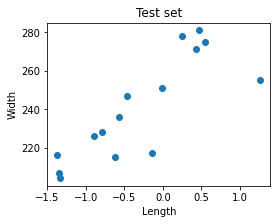

In [ ]:
plt.figure(figsize=(4, 3))
plt.scatter(train_set_x, train_set_y)
plt.title("Training set")
plt.xlabel("Length")
plt.ylabel("Width");

plt.figure(figsize=(4, 3))
plt.scatter(test_set_x, test_set_y)
plt.title("Test set")
plt.xlabel("Length")
plt.ylabel("Width");

## 3 - General Architecture of the learning algorithm ##

**Mathematical expression of the algorithm**:


For one example $x^{(i)}$:

$$h^{(i)} = \theta x^{(i)} + b\tag{1}$$
The cost is then computed by summing over all training examples:
$$J(\theta, b) = \frac{1}{2m}\sum_{i=1}^{m}(h^{(i)}- y^{(i)})^{2}\tag{2}$$ 

**Key steps**:
In this exercise, you will carry out the following steps:

   - Initialize the parameters of the model
   - Learn the parameters for the model by minimizing the cost  
   - Use the learned parameters to make predictions (on the test set)
   - Analyse the results and conclude

## 4 - Building the parts of our algorithm ## 

The main steps for building a learning algoritm:
1. Define the model structure (such as number of input features) 
2. Initialize the model's parameters
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)

You often build 1-3 separately and integrate them into one function we call `model()`.

### 4.1 - Initializing parameters

**Exercise:** Implement parameter initialization in the cell below. You have to initialize 
$\theta$ as zero.

In [7]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros():
    """
    This function initializes parameters theta and b as 0.
    
    Returns:
    theta -- initialized scalar parameter
    b -- initialized scalar (corresponds to the bias)
    """
    
    ### START CODE HERE ### (≈ 2 line of code)
    theta = 0
    b = 0
    ### END CODE HERE ###

    assert(isinstance(theta, int))
    assert(isinstance(b, int))
    
    return theta, b

In [ ]:
theta, b = initialize_with_zeros()
print ("theta = " + str(theta))
print ("b = " + str(b))

theta = 0
b = 0


**Expected Output**: 

<table>
    <tr>
        <td>theta = 0</td>
    </tr>
    <tr>
        <td>b = 0</td>
    </tr>
</table>

### 4.2 - Forward and Backward propagation

Now that your parameters are initialized, you can do the "forward" and "backward" propagation steps for learning the parameters.

**Exercise:** Implement a function `propagate()` that computes the cost function and its gradient.

**Hints**:

Forward Propagation:
- You get X
- You compute $H = (\theta X + b) = (h^{(1)}, h^{(2)}, ..., h^{(m-1)}, h^{(m)})$
- You calculate the cost function: $J(\theta, b) = \frac{1}{2m}\sum_{i=1}^{m}(h^{(i)} - y^{(i)})^{2}$


Here is the formula of gradient of the cost function: 

$$ \frac{\partial J}{\partial \theta} = \frac{1}{m}X(H-Y)^T\tag{3}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (h^{(i)}-y^{(i)})\tag{4}$$


In [8]:
def propagate(theta, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    theta -- parameter, a scalar
    b -- bias, a scalar
    X -- features vector of size (number of examples, )
    Y -- results vector (number of examples, )

    Return:
    cost -- cost function for linear regression
    dt -- gradient of the loss with respect to theta, thus same shape as theta
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation.
    - Use np.dot() to avoid for-loops in favor of code vectorization
    """
    
    m = X.shape[0]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### (≈ 2 lines of code)
    H = theta * X + b       # compute activation
    cost = (1 / (2*m)) * sum([i for i in (H - Y)**2])   # compute cost
    ### END CODE HERE ###

    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 2 lines of code)
    dt = ((1 / m) * X).dot(H - Y).T
    db = (1 / m) * sum([i for i in (H - Y)])
    ### END CODE HERE ###
    
    assert(dt.dtype == float)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dt": dt,
             "db": db}
    
    return grads, cost

In [ ]:
theta, b, X, Y = 1., 2., np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]), np.array([2, 3, 4, 5, 6, 7])
grads, cost = propagate(theta, b, X, Y)
print ("dt = " + str(grads["dt"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dt = -1.015
db = -2.15
cost = 3.4925


**Expected Output**:

<table>
    <tr>
        <td>dt = -1.015</td>
    </tr>
    <tr>
        <td>db = -2.15</td>
    </tr>
    <tr>
        <td>cost = 3.4925</td>
    </tr>
</table>

### 4.3 - Optimization
- You have initialized your parameters.
- You are also able to compute a cost function and its gradient.
- Now, you want to update the parameters using gradient descent.

**Exercise:** Write down the optimization function. The goal is to learn $\theta$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } \partial{}J$, where $\alpha$ is the learning rate.

In [9]:
# GRADED FUNCTION: optimize

def optimize(theta, b, X, Y, num_iterations, learning_rate, print_cost=False):
    """
    This function optimizes theta and b by running a gradient descent algorithm
    
    Arguments:
    theta -- parameter, a scalar
    b -- bias, a scalar
    X -- features vector of shape (number of examples, )
    Y -- results vector of shape (number of examples, )
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights theta and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for theta and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1 line of code)
        ### START CODE HERE ### 
        grads, cost = propagate(theta, b, X, Y)
        ### END CODE HERE ###

        # Retrieve derivatives from grads
        dt = grads["dt"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        theta = theta - (learning_rate * dt)
        b = b - (learning_rate * db)
        ### END CODE HERE ###
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"theta": theta,
              "b": b}
    
    grads = {"dt": dt,
             "db": db}
    
    return params, grads, costs

In [ ]:
params, grads, costs = optimize(theta, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False)
print ("theta = " + str(params["theta"]))
print ("b = " + str(params["b"]))
print ("dt = " + str(grads["dt"]))
print ("db = " + str(grads["db"]))

theta = 1.6451645666550938
b = 3.1951480476314393
dt = -0.5018556276988992
db = -0.7372605441640054


**Expected Output**: 

<table>
    <tr>
       <td>theta = 1.6451645666550938</td>
       <td>   </td>
    </tr>
    <tr>
       <td>b = 3.1951480476314393</td>
       <td>  </td>
    </tr>
    <tr>
       <td>dt = -0.5018556276988992</td>
       <td> </td>
    </tr>
    <tr>
       <td>db =  -0.7372605441640054</td>
       <td> </td>
    </tr>
</table>

**Exercise:** The previous function will output the learned $\theta$ and $b$. We are able to use $\theta$ and $b$ to predict the labels for a dataset X. Implement the `predict()` function. It must calculate $H = \theta X + b$.


In [10]:
# GRADED FUNCTION: predict

def predict(theta, b, X):
    """
    Predict using learned linear regression parameters (theta, b)
    
    Arguments:
    theta -- parameter, a scalar
    b -- bias, a scalar
    X -- features vector of size (number of examples, )
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions for the examples in X
    """
    
    # Compute vector "Y_prediction" predicting the width of a kangoroo nasal
    ### START CODE HERE ### (≈ 1 line of code)
    Y_prediction = theta * X + b
    ### END CODE HERE ###
    
    return Y_prediction

In [ ]:
theta = 0.1124579
b = -0.3
X = np.array([1., -1.1, -3.2, 1.2, 2., 0.1])
print ("predictions = " + str(predict(theta, b, X)))

predictions = [-0.1875421  -0.42370369 -0.65986528 -0.16505052 -0.0750842  -0.28875421]


**Expected Output**: 

<table>
    <tr>
         <td>
             predictions = [-0.1875421  -0.42370369 -0.65986528 -0.16505052 -0.0750842  -0.28875421]
         </td>
   </tr>
</table>


<font color='green'>
    <b>What to remember:</b>
You've implemented several functions that:
    
* Initialize (theta,b)
* Optimize the loss iteratively to learn parameters (theta,b):
    * computing the cost and its gradient 
    * updating the parameters using gradient descent
* Use the learned (theta,b) to predict the value for a given set of examples

## 5 - Merge all functions into a model ##

You will now see how the overall model is structured by putting together all the building blocks (functions implemented in the previous parts) together, in the right order.

**Exercise:** 

Implement the model function. Use the following notation:

   - `Y_prediction_test` for your predictions on the test set
   - `Y_prediction_train` for your predictions on the train set
   - `theta`, `costs`, `grads` for the outputs of optimize()

In [13]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    Builds the linear regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (m_train, )
    Y_train -- training values represented by a numpy array (vector) of shape (m_train, )
    X_test -- test set represented by a numpy array of shape (m_test, )
    Y_test -- test values represented by a numpy array (vector) of shape (m_test, )
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    ### START CODE HERE ###
    
    # initialize parameters with zeros (≈ 1 line of code)
    theta, b = initialize_with_zeros()

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(theta, b, X_train, Y_train, num_iterations, learning_rate, print_cost=False)

    
    # Retrieve parameters w and b from dictionary "parameters"
    theta = parameters["theta"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(theta, b, X_test)
    Y_prediction_train = predict(theta, b, X_train)

    ### END CODE HERE ###

    # Print train/test Errors
    print ("Train RMSE: {} ".format(np.sqrt(np.mean((Y_prediction_train - Y_train) ** 2))))
    print ("Test RMSE: {} ".format(np.sqrt(np.mean((Y_prediction_test - Y_test) ** 2))))
    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "theta" : theta, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [14]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=500, learning_rate=0.05, print_cost=True)

Train RMSE: 13.25047088422024 
Test RMSE: 16.20421532059726 


**Expected Output**: 

<table> 
    <tr>
        <td>Cost after iteration 0:  </td> 
        <td>30753.266667</td>
    </tr>
      <tr>
        <td> <center> $\vdots$ </center> </td> 
        <td> <center> $\vdots$ </center> </td> 
    </tr>  
    <tr>
        <td>Train RMSE:  </td> 
        <td>13.25047088422024 </td>
    </tr>
    <tr>
        <td>Test RMSE: </td> 
        <td> 16.20421532059726 </td>
    </tr>
</table> 

### Les't check the result

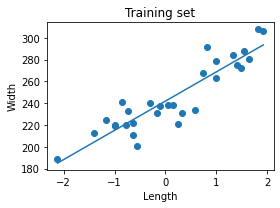

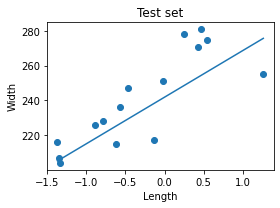

In [15]:
# Training set
plt.figure(figsize=(4, 3))
plt.title("Training set")

plt.scatter(train_set_x, train_set_y)
x = np.array([min(train_set_x), max(train_set_x)])
theta = d["theta"]
b = d["b"]
y = theta * x + b
plt.plot(x, y)  
plt.axis("tight")
plt.xlabel("Length")
plt.ylabel("Width");
plt.tight_layout()


# Test set
plt.figure(figsize=(4, 3))
plt.title("Test set")

plt.scatter(test_set_x, test_set_y)
x = np.array([min(test_set_x), max(test_set_x)])
theta = d["theta"]
b = d["b"]
y = theta * x + b
plt.plot(x, y)  
plt.axis("tight")
plt.xlabel("Length")
plt.ylabel("Width");
plt.tight_layout()

##### Linear Regression with one variable Done!

##### Make sure that you didn't add or delete any notebook cells. Otherwise your work may not be accepted by the validator!